## solutions to the tensorflow intro

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.2.1'

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
a = tf.placeholder(tf.float32, [10, ])
b = tf.placeholder(tf.float32, [10, ])
c = tf.placeholder(tf.float32, [10, ])

# this line is extremely important !
# we are adding two tensors and a python scalar
# these tensor operations are overloaded to support the most diverse datatypes
# this includes broadcasting
result = a*b + c

print(result)

Tensor("add:0", shape=(10,), dtype=float32)


In [7]:
sess = tf.Session()

In [8]:
# take a look at the syntax of run
# the important parameter is feed_dict, it uses the placeholder objects as keys in a dictionary
sess.run(result, feed_dict={a : np.ones((10,)), b : np.ones((10,)), c:np.random.rand(10)})

array([ 1.02216566,  1.76609099,  1.94157422,  1.5157392 ,  1.46556485,
        1.50920129,  1.29915226,  1.8723104 ,  1.45589745,  1.04161274], dtype=float32)

### your turn
Run the cell above multiple times. Do you notice something ?

The random numbers are not random, they are always the same.
That's because tensorflow splits the creation of the graph from the evaluation.
When you first added a, b and the random numbers, the random call was evaluated and the result hardcoded into the graph.

1. Create an additional placeholder and feed random numbers to the operation

### your turn

Play around with the code above.

implement the matrix inversion version in tensorflow.

Try to produce a sine curve as input data and fit a model to that.

In [9]:
x = np.linspace(0, 10, 100)
y = np.sin(x+1)*2 + np.random.rand(100)

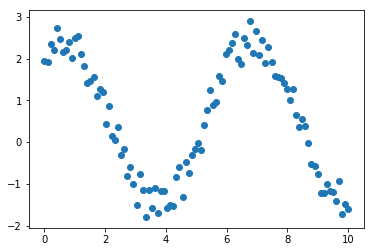

In [10]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [11]:
in_x = tf.placeholder(tf.float32, (1,), name="in_x")
in_y = tf.placeholder(tf.float32, (1,), name="in_y")
lr = tf.placeholder(tf.float32, name="lr")

theta = tf.Variable(np.random.rand(2), dtype=tf.float32)

shifted_x = in_x + theta[0]
out_y = tf.sin(shifted_x) * theta[1]

quality = (in_y - out_y) ** 2


# this is the optimization code
# fairly ugly, usually you don't write this yourself
# bear with me
gradients = tf.gradients(quality, theta)
delta = tf.reshape(lr*gradients, (-1,))
optimize_operation = tf.assign(theta,  theta - delta)

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

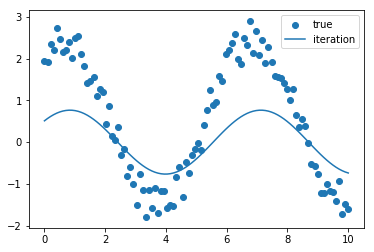

In [14]:
p_y = np.zeros((100,))

for idx in range(len(x)):
    
    x_value = x[idx].reshape((1,))
    
    p_y[idx] = sess.run(out_y, feed_dict={in_x: x_value})

plt.figure()
scatter = plt.scatter(x, y)
line1, = plt.plot(x, p_y)
plt.legend([scatter, line1], ["true", "iteration"])
plt.show()

In [15]:
for i in range(10000):
    idx = np.random.choice(len(x))

    x_value = x[idx].reshape((1,))

    y_value = y[idx].reshape((1,))

    p_y, p_quality, _ = sess.run((out_y, quality, optimize_operation), feed_dict={in_x: x_value, in_y: y_value, lr: 1e-1})

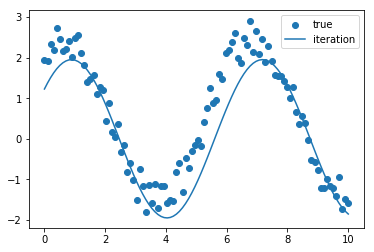

In [17]:
p_y = np.zeros((100,))

for idx in range(len(x)):
    
    x_value = x[idx].reshape((1,))
    
    p_y[idx] = sess.run(out_y, feed_dict={in_x: x_value})

plt.figure()
scatter = plt.scatter(x, y)
line1, = plt.plot(x, p_y)
plt.legend([scatter, line1], ["true", "iteration"])
plt.show()